<h1>Convolutional Neural Network with Batch-Normalization </h1> 



<h3>Objective for this Notebook<h3>    
Compare a Convolutional Neural Network using Batch Normalization with a regular Convolutional Neural Network  to classify handwritten digits from the MNIST database..</h5>     



<h2>Table of Contents</h2>
<b>This lab takes a long time to run so the results are given. You can run the notebook your self but it may take a long time.</b>
<p>In this lab, we will compare a Convolutional Neural Network using Batch Normalization with a regular Convolutional Neural Network  to classify handwritten digits from the MNIST database. We will reshape the images to make them faster to process. </p>

<ul>
    <li><a href="#read_me">Read me Batch Norm for Convolution Operation  </a></li>
<li><a href="#Makeup_Data">Get Some Data</a></li>
<li><a href="#CNN">Two Types of Convolutional Neural Network</a></li>
<li><a href="#Train">Define Criterion function, Optimizer and Train the Model</a></li>
<li><a href="#Result">Analyze Results</a></li>
</ul>
<hr>


<h2> Read me Batch Norm for Convolution Operation  </h2>


Like a fully connected network, we create a <code>BatchNorm2d</code> object, but we apply it to the 2D convolution object. First, we create objects <code>Conv2d</code> object; we require the number of output channels, specified by the variable <code>OUT</code>.  


<code>self.cnn1 = nn.Conv2d(in_channels=1, out_channels=OUT, kernel_size=5, padding=2) </code>


We then create a Batch Norm  object for 2D convolution as follows:


<code>self.conv1_bn = nn.BatchNorm2d(OUT)</code>


The parameter out is the number of channels in the output. We can then apply batch norm  after  the convolution operation :


<code>x = self.cnn1(x)</code>
<p></p>
 <code> x=self.conv1_bn(x)</code>


<!--Empty Space for separating topics-->


<h2>Preparation</h2>


In [3]:

# Import the libraries we need to use in this lab

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np


In [21]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

<h2 id="Makeup_Data">Get the Data</h2> 


we create a transform to resize the image and convert it to a tensor :


In [4]:

IMAGE_SIZE = 16

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

Load the training dataset by setting the parameters <code>train </code> to <code>True</code>. We use the transform defined above.


In [5]:
# Make the validating 

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

In [6]:

train_dataset = dsets.MNIST(root='./data', train=True, download=False, transform=composed)

Load the testing dataset by setting the parameters train  <code>False</code>.


We can see the data type is long.


In [7]:
# Show the data type for each element in dataset

type(train_dataset[0][1])

int

Each element in the rectangular tensor corresponds to a number representing a pixel intensity as demonstrated by the following image.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.2.1imagenet.png" width="550" alt="MNIST data image">


Print out the fourth label 


In [8]:
# The label for the fourth data element

train_dataset[3][1]

1

Plot the fourth sample 


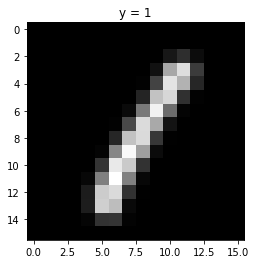

In [9]:
# The image for the fourth data element
show_data(train_dataset[3])


The fourth sample is a "1".


<!--Empty Space for separating topics-->


<h2 id="CNN">Build a Two Convolutional Neural Network Class</h2>


Build a Convolutional Network class with two Convolutional layers and one fully connected layer. Pre-determine the size of the final output matrix. The parameters in the constructor are the number of output channels for the first and second layer.


In [10]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x


This is how we get the 4x4 image size after cnn1, maxpool1, cnn2 and maxpool2:

   1. 'out_2' is a given parameter when  the cnn2 was defined, it is the output of cnn2 equal to 32

   2. 4x4 is the result of the 'image size' after cnn1, maxpool1, cnn2 and maxpool2:

2.a. Input size is 16x16

2.b. after cnn1, size per channel (total of 16 channels) is (16 + 2*2 -5)/1 + 1 = 16x16

2.c after maxpool 1, size per channel (still total of 16 channels) is (16 + 2*0 - 2)/2 + 1 (stride size is equal to kernel size of 2) = 8x8 

2.c after cnn2, size per channel (now the total channel is 32) is (8+ 2*2 -5)/1 + 1 =8x8

2.d. after maxpool2, size per channel (32 channels passed from cnn2) is (8  + 2*0 -2)/2 + 1= 4x4

Build a Convolutional Network class with two Convolutional layers and one fully connected layer. But we add Batch Norm for the convolutional layers. 


In [11]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1) # Adding batch normalization
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2) # Adding batch normalization
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(number_of_classes) # Adding batch normalization

    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Function to train the model 


In [12]:
# Run on GPU
mps_device = torch.device("mps")

In [13]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
    
    #global variable 
    N_test=len(validation_dataset)
    accuracy_list=[]
    loss_list=[]
    model = model.to(mps_device)
    for epoch in range(n_epochs):
        print(f"Epoch Number : {epoch}")
        for x, y in train_loader:
            x = x.to(mps_device)
            y = y.to(mps_device)
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.data)
        
        print(f"Current loss {loss.data}")
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            model.eval()
            x_test = x_test.to(mps_device)
            y_test = y_test.to(mps_device)
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        print(f"Current Validation Accuracy {accuracy *100}%")
        print("=====================================")
        accuracy_list.append(accuracy)
     
    return accuracy_list, loss_list

<h2 id="Train">Define the Convolutional Neural Network Classifier, Criterion function, Optimizer and Train the Model</h2> 


There are 16 output channels for the first layer, and 32 output channels for the second layer 


In [14]:
# Create the model object using CNN class
model = CNN(out_1=16, out_2=32)

Define the loss function, the optimizer and the dataset loader 


In [15]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

Train the model and determine validation accuracy technically test accuracy **(This may take a long time)**


In [16]:
# Train the model
accuracy_list_normal, loss_list_normal=train_model(model=model,n_epochs=10,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

Epoch Number : 0
Current loss 0.31739237904548645
Current Validation Accuracy 94.98%
Epoch Number : 1
Current loss 0.30367323756217957
Current Validation Accuracy 96.98%
Epoch Number : 2
Current loss 0.31074073910713196
Current Validation Accuracy 97.58%
Epoch Number : 3
Current loss 0.3070160746574402
Current Validation Accuracy 97.92%
Epoch Number : 4
Current loss 0.2890056371688843
Current Validation Accuracy 97.95%
Epoch Number : 5
Current loss 0.2690649628639221
Current Validation Accuracy 98.03%
Epoch Number : 6
Current loss 0.2578352987766266
Current Validation Accuracy 98.16%
Epoch Number : 7
Current loss 0.24908484518527985
Current Validation Accuracy 98.27%
Epoch Number : 8
Current loss 0.24271109700202942
Current Validation Accuracy 98.29%
Epoch Number : 9
Current loss 0.23769958317279816
Current Validation Accuracy 98.34%


Repeat the Process for the model with  batch norm 


In [17]:
model_batch=CNN_batch(out_1=16, out_2=32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_batch.parameters(), lr = learning_rate)
accuracy_list_batch, loss_list_batch=train_model(model=model_batch,n_epochs=10,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

Epoch Number : 0
Current loss 0.11461959779262543
Current Validation Accuracy 98.16%
Epoch Number : 1
Current loss 0.09702993929386139
Current Validation Accuracy 98.58%
Epoch Number : 2
Current loss 0.08641164749860764
Current Validation Accuracy 98.77%
Epoch Number : 3
Current loss 0.07894333451986313
Current Validation Accuracy 98.87%
Epoch Number : 4
Current loss 0.07609138637781143
Current Validation Accuracy 98.92%
Epoch Number : 5
Current loss 0.06878571957349777
Current Validation Accuracy 98.98%
Epoch Number : 6
Current loss 0.0631265640258789
Current Validation Accuracy 98.94%
Epoch Number : 7
Current loss 0.05331498011946678
Current Validation Accuracy 98.92%
Epoch Number : 8
Current loss 0.042542051523923874
Current Validation Accuracy 98.87%
Epoch Number : 9
Current loss 0.028587354347109795
Current Validation Accuracy 98.91%


<!--Empty Space for separating topics-->


<h2 id="Result">Analyze Results</h2> 


Plot the loss with both networks.


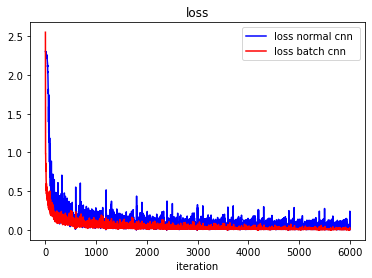

In [19]:
# Plot the loss and accuracy
# Re-convert it to CPU utilization for printing the results
loss_list_normal = list(map(lambda x: x.to(torch.device('cpu')), loss_list_normal))
loss_list_batch = list(map(lambda x: x.to(torch.device('cpu')), loss_list_batch))

plt.plot(loss_list_normal, 'b',label='loss normal cnn ')
plt.plot(loss_list_batch,'r',label='loss batch cnn')
plt.xlabel('iteration')
plt.title("loss")
plt.legend()

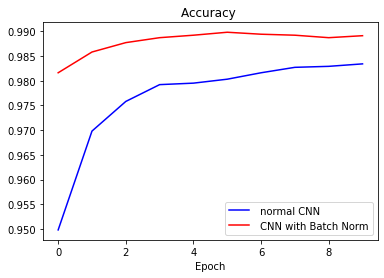

In [20]:
plt.plot(accuracy_list_normal, 'b',label=' normal CNN')
plt.plot(accuracy_list_batch,'r',label=' CNN with Batch Norm')
plt.xlabel('Epoch')
plt.title("Accuracy ")
plt.legend()
plt.show()

We see the CNN with batch norm performers better, with faster convergence.
